# Project: Investigate a TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

In this section of the report, I provide a brief introduction to the TMDb Movie Dataset I've selected for analysis. 

**Importing Packages**

But first we need some packages to anlayze the dataset. Here I import them by following codes. 
 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

Second step is to to make certain we are having access to the folder of dataset. So, lets change the path to **desired folder** with understudy data. 

In [12]:
cd E:\Google Drive-MST\Machine Learning\1-Data Analyst\Project 2\investigate-a-dataset-template.ipynb

E:\Google Drive-MST\Machine Learning\1-Data Analyst\Project 2\investigate-a-dataset-template.ipynb


Lets where we are.

In [13]:
pwd

'E:\\Google Drive-MST\\Machine Learning\\1-Data Analyst\\Project 2\\investigate-a-dataset-template.ipynb'

**Loading data**

First load the data and call it as dataframe or **df**

In [14]:
df=pd.read_csv('tmdb-movies.csv')

In [15]:
df.head(5)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

** Questions**

By now, loading first few rows of all columns, we gain some genral information aboout the dataset. 



In this section, I want to be define some questions that could be answered using this dataset.

1. Question: Which genres are most popular in overal?
2. Question: How the popularity of all genres together changes year by year?
3. Question: Which genres are most popular from year to year?
4. Question: What kinds of properties are associated with movies that have high revenues?


<a id='wrangling'></a>
## 2. Data Wrangling

In this section of the report, I load the data, check for cleanliness, and then I decide if I want to trim and clean the dataset for analysis or not!

**General Properties**

Lets see what are row and columns in the df

In [20]:
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

First 5 row of the dataframe (df) is shown above, including: id, imdb_id, popularity, budget, revenue, original_title and so on.

* Shape of df

  Let see how many rows and how many columns exist in our df.

In [21]:
df.shape

(10866, 21)

so, we have 10866 rows, and 21 columns. The rows are giving information of each movie and columns are showing the properties (or you could say information) about each move. You may ask, what kind of information. Lets see what are information for each movie by represnting the column names. 

In [22]:
for i, v in enumerate (df.columns):
    print (i,v);

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


Better description of data: The data set contain information about 10866 movies and reported 21 different features of them including:id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, and revenue_adj

* Type of data and missing values

  The next question that crosses the mind of you, may be "What kind of data is included for each feature?" Lets find it out by below code.

In [23]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Interesting! Only by one word we discovered the **types** of different features in the df! 

Example: id is an integer, idmb_id is an object, vote_average is a floating number.

**Note: Object in df is equivalent to "string" format!**

We also where we are **missing some data**! 

Example: Remember we had 10866 rows in df. So the information in each column showld be the same (10866). So, take a look at "homepage." It only contain 2936 data points! So Obviously it is missing some data.

### 3. Data Cleaning (Replace this with more specific notes!)

**Removing duplicates**

* Finding duplicate counts

  First lets find out how many duplicates we have in df.

In [24]:
df.duplicated().sum()

1

There is only 1 duplicated row in the df

* Dropping duplicates  

  Lets drop the dupliaceted movie

In [25]:
df.drop_duplicates(inplace=True)

Check if there is any other duplicates?

In [26]:
df.duplicated().sum()

0

Good! Duplicates are removed from the df!

One row is removed from the df. Lets check it.

In [27]:
df.shape

(10865, 21)

**Describe df**

Lets discover some basic statistics of each column such as count, average, standard deviation, minimum, maximum.

In [28]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10865.000000  10865.000000  1.086500e+04  1.086500e+04  10865.000000   
mean    66066.374413      0.646446  1.462429e+07  3.982690e+07    102.071790   
std     92134.091971      1.000231  3.091428e+07  1.170083e+08     31.382701   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00     90.000000   
50%     20662.000000      0.383831  0.000000e+00  0.000000e+00     99.000000   
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10865.000000  10865.000000  10865.000000  1.086500e+04  1.086500e+04  
mean     217.399632      5.975012   2001.321859  1.754989e+07  5.136900e+07  
std      575.644627      0.935138     12.813260  3.430753e+07  1.446383e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      146.000000      6.600000   2011.000000  2.085325e+07  3.370173e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

Above mentioned the basic statistics in each column.

**Example** The minimum popularity=0.000065 and maximumx popularity=32.985763

**Note**
I personally do not like trimming the data with no reason. I prefer to be goal oriented! I mean, later when I am answeing some questions I may edit the df, drop NaN values, fill the "NaN"s with another value, mask the dataframe. 

<a id='eda'></a>
## 3. Exploratory Data Analysis
### Question 1: Which genres are most popular in overal? 

**Coppying df** 

I prefer to have a copy of df. By this, I always can see what I have in original df and comare it with the new df

In [29]:
df1=df;

For this question we need to analyze popularity of different type of movies

In [30]:
df1[["id","genres"]].head()

id                                     genres
0  135397  Action|Adventure|Science Fiction|Thriller
1   76341  Action|Adventure|Science Fiction|Thriller
2  262500         Adventure|Science Fiction|Thriller
3  140607   Action|Adventure|Science Fiction|Fantasy
4  168259                      Action|Crime|Thriller

Well! Here you can see that there are different genres associated with the same movie!

**Assmption**

**The first type of genre** for each movie (which is represnted in genres column) is the **main genre** of that movie.

So lets keep only the first genre in genres column.

In [31]:
df1['genres']=df['genres'].str.split('|').str.get(0)

Did it work?

In [32]:
df1[["id","genres"]].head()

id     genres
0  135397     Action
1   76341     Action
2  262500  Adventure
3  140607     Action
4  168259     Action

Yes! Now, only one genre (basically the fist genre in genres column) is assigned to the genre type of each movie! great!

Lets use groupby function to categorize the movies by their genres and gain the average popularity of each genre.

In [33]:
genres_popularity=df1.groupby("genres").popularity.mean()
genres_popularity

genres
Action             0.836394
Adventure          1.217868
Animation          0.810370
Comedy             0.537133
Crime              0.694063
Documentary        0.177023
Drama              0.552446
Family             0.730987
Fantasy            0.865390
Foreign            0.167124
History            0.764636
Horror             0.468611
Music              0.447730
Mystery            0.596896
Romance            0.704157
Science Fiction    1.073096
TV Movie           0.246190
Thriller           0.673381
War                0.767041
Western            0.690646
Name: popularity, dtype: float64

Lets see visualize the average popularity of each genre.

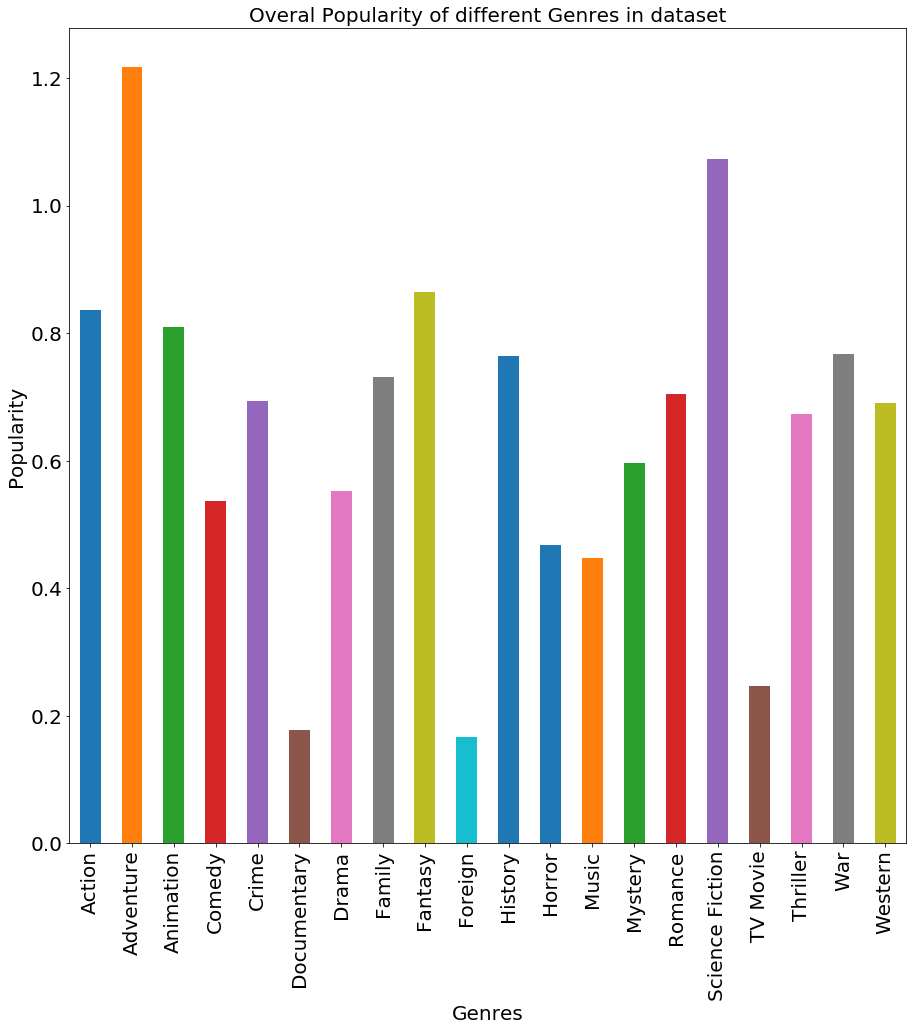

In [34]:
genres_popularity.plot(kind="bar", figsize=(15,15),fontsize =20)
plt.xlabel('Genres',fontsize =20)
plt.ylabel('Popularity',fontsize =20)
plt.title('Overal Popularity of different Genres in dataset',fontsize =20)
plt.show()

**Conclusion**
By far, the popularity of Adventure and Science Fiction movies are higher than others and are respectively ~1.2 and ~1.
The popularity of Documentary, Foreign and TV Movie are almost the same and are the least popilar movies. 
The popluarity of the rest of genres are between 0.4 and 0.8.

### Question 2: How the popularity of all genres together changes year by year?
To answer to this question, we need to use groupby the dataset by year. Lets do that. 

In [35]:
popularity_yearly=df1.groupby("release_year").popularity.mean()
popularity_yearly

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
1965    0.342587
1966    0.304112
1967    0.471154
1968    0.484202
1969    0.422778
1970    0.341700
1971    0.448112
1972    0.449054
1973    0.494462
1974    0.447829
1975    0.519445
1976    0.474516
1977    0.626387
1978    0.413314
1979    0.589312
1980    0.495652
1981    0.442413
1982    0.543353
1983    0.541445
1984    0.590843
1985    0.584058
1986    0.509545
1987    0.504637
1988    0.465039
1989    0.563658
1990    0.535735
1991    0.501090
1992    0.582913
1993    0.547056
1994    0.668825
1995    0.710722
1996    0.604768
1997    0.712003
1998    0.626165
1999    0.645799
2000    0.546799
2001    0.702658
2002    0.701454
2003    0.719083
2004    0.722438
2005    0.628663
2006    0.606371
2007    0.593161
2008    0.584817
2009    0.600178
2010    0.645058
2011    0.675069
2012    0.607197
2013    0.627627
2014    0.887268
2015    1.030657
Name: popularity, dtype: float64

Lets visualize it. 

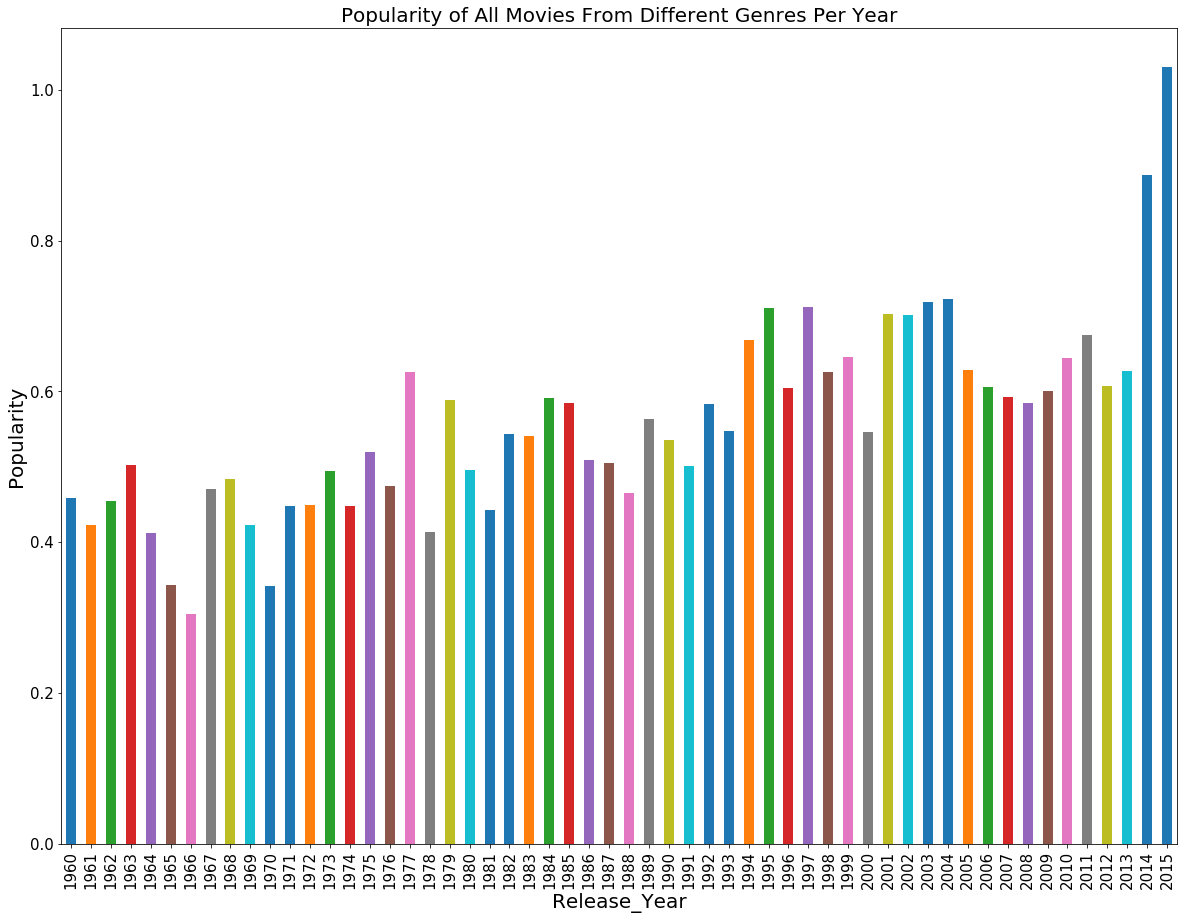

In [36]:
popularity_yearly.plot(kind="bar", figsize=(20,15),fontsize =15);
plt.xlabel('Release_Year',fontsize =20)
plt.ylabel('Popularity',fontsize =20)
plt.title('Popularity of All Movies From Different Genres Per Year',fontsize =20)
plt.show();

**Conclusion:**
That is very interesting result! in genereal the popularity of movies has been increaaseing gradually from ~0.4 in early 1960 to ~0.6 in first decade of 20th century. In 2014 and 2015, there is a trmendous surge in popularity of movies from ~0.6 to more than 0.9. 

That would be also interesting to see these changes by using a line graph. lets do that! 

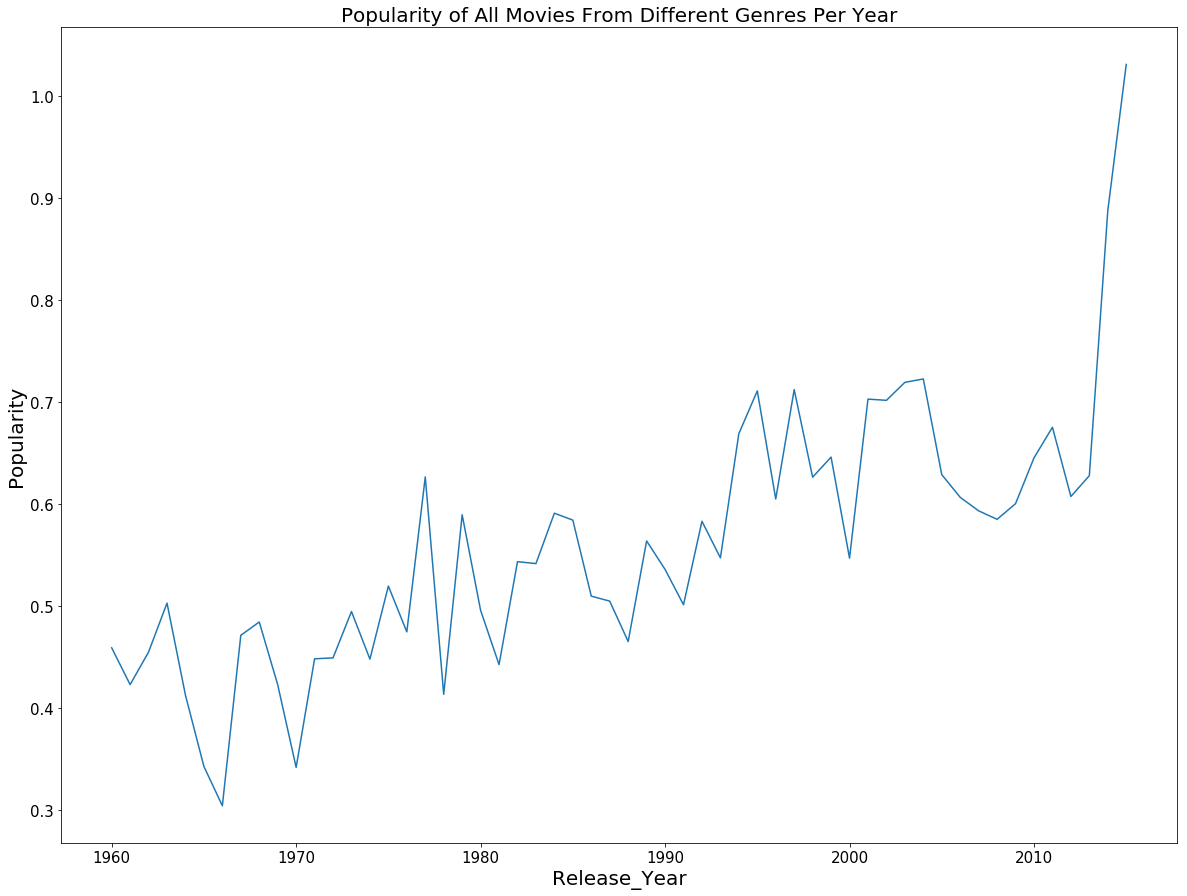

In [37]:
popularity_yearly.plot(kind="line", figsize=(20,15),fontsize =15);
plt.xlabel('Release_Year',fontsize =20)
plt.ylabel('Popularity',fontsize =20)
plt.title('Popularity of All Movies From Different Genres Per Year',fontsize =20)
plt.show();

That is very interesting to see how changing the graph type would help to visualize the data and gain some inetesrting conclusions. 

### Question 3: Which genres are most popular from year to year? 

We can use seaborn to visualize and see how the poplularity of each gender is changing every year. 

**Yearly PopularityMean of Different Denres**


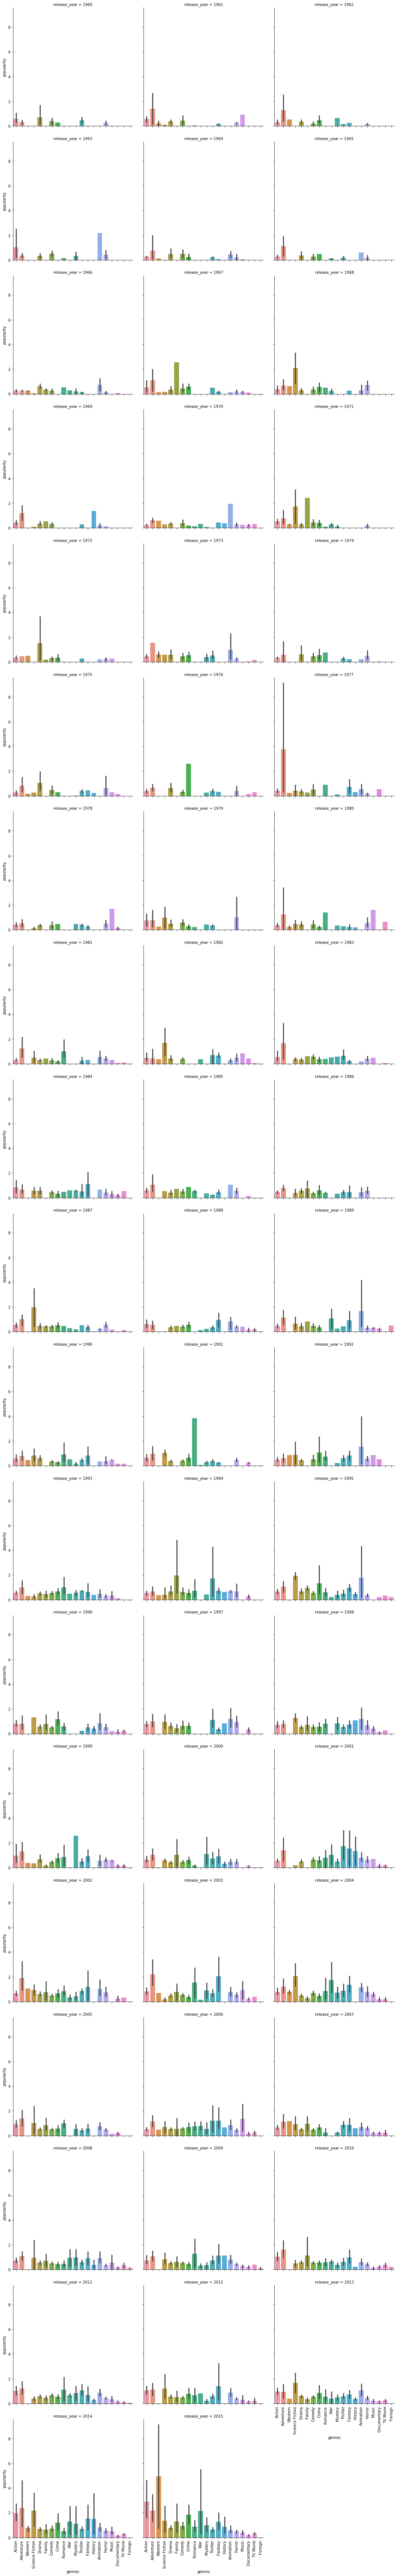

In [40]:
# create a factorplot with seaborn
graph = sns.factorplot(x = 'genres', y = 'popularity', col="release_year", 
                   col_wrap=3, data=df1, 
                   kind="bar", size=5, aspect=1)
graph.set_xticklabels(rotation=90)
print("**Yearly PopularityMean of Different Denres**")
plt.show()

Well! ** IT IS AMAZING!** I spend a couple of days and tried so many different things to visualize this graphs with many different commands such as "if", "for" and so on!!!
To be honest with you, I was so frustrated and i could not sleep! 
The **seaborn** is greatest! :) 

In these graphs we can see how the popularity of each particular genre is chnaging by year! 

**Example** in 2015, the most poular genre is western movies!

**Conclusion:**

The popularity of genres is fluctuating every year. But in some years some genres are surging, for example in 1997, the popularity of Adventures movies increased dramatically from <1 in 1976 to around 4 in 1977. You can take a look at otehr graphs as well. 

### Question 4: What kinds of properties are associated with movies that have high revenues?

lets define a new dataframe as df2 equal to original df

In [425]:
df2=df;
df2.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Lets drop a couple of columns, which either are not useful to answer the question. I selected these columns by results of In [372].

In [426]:
df2.drop(columns=['id', 'imdb_id', 'original_title','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres',
          'production_companies', 'release_date', 'vote_count', 'vote_average', 'budget_adj','revenue_adj'], axis=1,inplace=True);

lets see what is left in the df2

In [333]:
df2.head(2)

popularity     budget     revenue  runtime  release_year
0   32.985763  150000000  1513528810      124          2015
1   28.419936  150000000   378436354      120          2015

Lets see how the revenue is changing versus other variabes. Below graphs may help to have a basic understanding about the rleationship between revenue and other features.

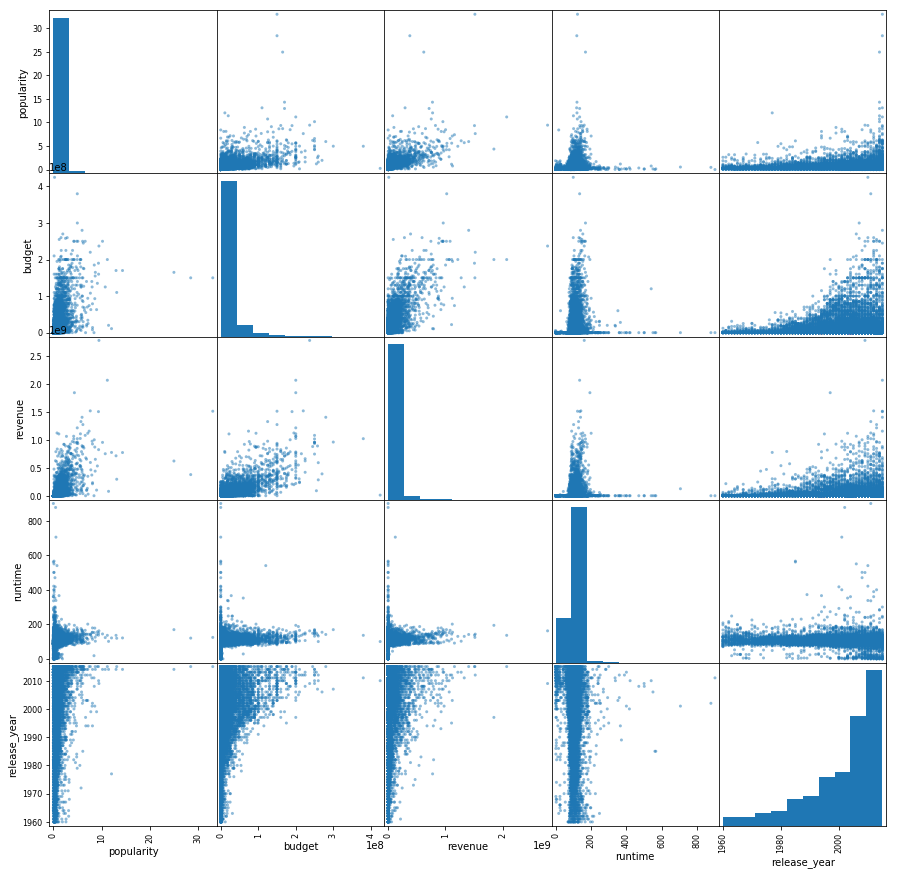

In [334]:
pd.plotting.scatter_matrix(df2,figsize=(15,15));

Above graphs show that revenue has a direct relationship with popularity and budget. So, I only keep popularity, budget and revenue columns and get rid of runtime and release_year columns

In [335]:
df2.drop(columns=["runtime","release_year"], axis=1,inplace=True);
df2.head(1)

popularity     budget     revenue
0   32.985763  150000000  1513528810

Are we missing any value in budget or revenue?

In [342]:
df2.isnull().sum()

popularity    0
budget        0
revenue       0
dtype: int64

Apperantly not! Lets see the mean, min, and max of df2

In [339]:
df2.describe()

popularity        budget       revenue
count  10866.000000  1.086600e+04  1.086600e+04
mean       0.646441  1.462570e+07  3.982332e+07
std        1.000185  3.091321e+07  1.170035e+08
min        0.000065  0.000000e+00  0.000000e+00
25%        0.207583  0.000000e+00  0.000000e+00
50%        0.383856  0.000000e+00  0.000000e+00
75%        0.713817  1.500000e+07  2.400000e+07
max       32.985763  4.250000e+08  2.781506e+09

Wow! Many data in budget and revenue are 0!!

Okay lets see the median of popularity on df2. This value will be used to categorize the popularity to less and more popular movies in the next command line. 

In [428]:
df2.popularity.median()

0.383831

So, We can use this value to devide the df2 to two classes

* class1:df2_less_popular

* class2:df2_less_popular

Lets do it then.

In [429]:
df2_less_popular=df2[df2["popularity"]<=0.3838555];
df2_less_popular=df2[df2["popularity"]>0.3838555];

lets see if the df2 is devided to two classes and we are not missing any value!

In [430]:
number_of_samples=df2.shape[0]
number_of_samples==df2_less_popular["revenue"].count()+df2_more_popular["revenue"].count()

True

The answer of above code is "True". So, it means we are not missing any values.

lets check if by increasing popularity, the revenue increases or not?

In [431]:
df2_less_popular.revenue.mean()<df2_more_popular.revenue.mean()

False

**Conclusion:**

By increaisng the popularity the revenue increases.

In [432]:
# lets do the same thing for budget:
df.budget.median()
# apparenetly the information for budget for some movies is unknown
df.budget.mean()

14624286.06433502

In [433]:
df2_low_budget=df2[df2["budget"]<=14625701.09414688];
df2_high_budget=df2[df2["budget"]>14625701.09414688];

In [434]:
number_of_samples=df2.shape[0]
number_of_samples==df2_low_budget["revenue"].count()+df2_high_budget["revenue"].count()

True

In [435]:
df2_low_budget.revenue.mean()<df2_high_budget.revenue.mean()

True

**Conclusion:**

By increasing budget, the revenue increases!

<a id='conclusions'></a>
## Conclusions and Limitations
### Conclusions
1. Overal, by far the popularity of Adventure and Science Fiction movies are higher than others and are respectively ~1.2 and ~1. The popularity of Documentary, Foreign and TV Movie are almost the same and are the least popilar movies. The popluarity of the rest of genres are between 0.4 and 0.8.

2. In genereal the popularity of movies has been increaaseing gradually from ~0.4 in early 1960 to ~0.6 in first decade of 20th century. In 2014 and 2015, there is a trmendous surge in popularity of movies from ~0.6 to more than 0.9.

3. The popularity of genres is fluctuating every year. But in some years some genres are surging, for example in 1997, the popularity of Adventures movies increased dramatically from <1 in 1976 to around 4 in 1977. You can take a look at otehr graphs as well. 

4. By increaisng the popularity the revenue increases.

5. By increasing budget, the revenue increases!

### Limitations

1. The assuption that I used is very strong and basically I am not considering the fact that each movie may have different geners.
2. The polularity is basced on collected information in developed conuntries that everyone has a free access to the movie links such as IMDB. The popularity may only represnt the opinion of some countries. That would be nice we have some more information about number of votes from different countries. 
3. There are many old movies in that not many people wathced them. By the way, right now all young people are using internet every day. That would be very helpful to have some other columns regarding the age and gender of people who vite for movies. 
4. It was very challenging to visualize the genres, relase year and popularity at the same time. 